In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import tensorflow as tf
import seaborn as sns

In [2]:
KT_people_info= pd.read_excel("D:/금융빅데이터공모전_데이터/KT_유동인구.xlsx",sheet_name="테이블 설명")
KT_people_data=pd.read_excel("D:/금융빅데이터공모전_데이터/KT_유동인구.xlsx", sheet_name="유동인구 데이터")
#행정동 코드 데이터
KT_goverment= pd.read_excel("D:/금융빅데이터공모전_데이터/KT_goverment_place.xlsx")

## KT_people_info.loc[:,["컬럼명"]]
## KT_people_info["컬럼명"]

## KT_인구이동 데이터 컬럼 설명
AMD_CD: 행정동 코드       
etl_ymd: 기준 일자
timezn_cd: 기준 시간

mnn: 남자 nn~+4세 유동인구 수
fnn: 여자 nn~+4세 유동인구 수
    total이 붙으면 전체 성별 유동 수
    
201906DD동안 1달짜리       종로구, 중구

['AMD_CD', 'etl_ymd', 'timezn_cd', 'm00', 'm10', 'm15', 'm20', 'm25',
       'm30', 'm35', 'm40', 'm45', 'm50', 'm55', 'm60', 'm65', 'm70', 'f00',
       'f10', 'f15', 'f20', 'f25', 'f30', 'f35', 'f40', 'f45', 'f50', 'f55',
       'f60', 'f65', 'f70', 'm_total', 'w_total', 'total']

In [380]:
people_data= change_place_code2name(KT_people_data)
people_data.head()

etl_ymd  timezn_cd  m00  m10  m15  m20  m25  m30  m35  m40    ...      \
0  20190601          0    0    0   41  145  340  231  200  130    ...       
1  20190601          1    0    0   22  136  210  156  168   68    ...       
2  20190601          2    0    0   17  129  218  135  162  111    ...       
3  20190601          3    0    0   51   90  137   73  138   91    ...       
4  20190601          4    0    0    8   95  114  104  107   88    ...       

   f45  f50  f55  f60  f65  f70  m_total  w_total  total      place  
0   93   68   41   19    5   23     1598      912   2510  종로구 청운효자동  
1   74   38   26    1    0   14     1233      581   1814  종로구 청운효자동  
2  101   76   47    9    6   16     1268      839   2107  종로구 청운효자동  
3   88   54   22    5    6   18      830      586   1416  종로구 청운효자동  
4   81   54   17    7    7    4      782      512   1294  종로구 청운효자동  

[5 rows x 34 columns]

In [391]:
people_data=people_data[['place','etl_ymd','m00', 'm10', 'm15', 'm20', 'm25', 'm30', 'm35', 'm40',
       'm45', 'm50', 'm55', 'm60', 'm65', 'm70', 'f00', 'f10', 'f15', 'f20',
       'f25', 'f30', 'f35', 'f40', 'f45', 'f50', 'f55', 'f60', 'f65', 'f70',
       'm_total', 'w_total', 'total']]
save_by_place(people_data)


In [343]:
#f20_people["AMD_CD"].drop_duplicates()
#행정동 parse
place_dic={}
#KT_goverment
count_=0
for i in KT_goverment.index:
    place_=KT_goverment["SGG_NM"][i]+" "+KT_goverment["AMD_NM"][i]
    if KT_goverment["AMD_CD"][i] not in place_dic:
        place_dic[KT_goverment["AMD_CD"][i]]=place_
print(place_dic)

{11110600: '종로구 가회동', 11110580: '종로구 교남동', 11110570: '종로구 무악동', 11110550: '종로구 부암동', 11110530: '종로구 사직동', 11110540: '종로구 삼청동', 11110700: '종로구 숭인1동', 11110710: '종로구 숭인2동', 11110640: '종로구 이화동', 11110615: '종로구 종로1.2.3.4가동', 11110630: '종로구 종로5.6가동', 11110670: '종로구 창신1동', 11110680: '종로구 창신2동', 11110690: '종로구 창신3동', 11110515: '종로구 청운효자동', 11110560: '종로구 평창동', 11110650: '종로구 혜화동', 11140590: '중구 광희동', 11140625: '중구 다산동', 11140665: '중구 동화동', 11140550: '중구 명동', 11140520: '중구 소공동', 11140650: '중구 신당5동', 11140615: '중구 신당동', 11140635: '중구 약수동', 11140605: '중구 을지로동', 11140580: '중구 장충동', 11140680: '중구 중림동', 11140645: '중구 청구동', 11140570: '중구 필동', 11140670: '중구 황학동', 11140540: '중구 회현동'}


In [390]:
#행정동 데이터를 코드에서 이름으로 변환 
def change_place_code2name(df):#, fname):
    temp_=[]
    for i in df.index:
        temp_.append(place_dic[df["AMD_CD"][i]])
    df["place"]=temp_
    df=df.drop("AMD_CD",1)
    return df
    
#시간대는 분류X, 날짜까지만
def save_by_place(df, idx=0):
    data=df.groupby([df["place"], df["etl_ymd"]]).sum()
    data.to_csv("data/day_people_count.csv")

fname_list=[ 'm00', 'm10', 'm15', 'm20', 'm25', 'm30', 'm35', 'm40', 'm45', 
                 'm50', 'm55', 'm60', 'm65', 'm70', 'f00', 'f10', 'f15', 'f20', 
                 'f25', 'f30', 'f35', 'f40', 'f45', 'f50', 'f55', 'f60', 'f65', 
                 'f70', 'm_total', 'w_total', 'total']

In [2]:
place_count_data= pd.read_csv("data/day_people_count.csv")
#print(place_count_data.shape)

In [3]:
place_list=place_count_data["place"].drop_duplicates().values
place_data=[]
for place_ in place_list:
    place_data.append(place_count_data.loc[place_count_data["place"]==place_])

## 추가 개념
f20_people.pivot("etl_ymd","place","f20")

시리즈는 index(배열), values로 이루어짐

In [429]:
import matplotlib.pylab as plt
import matplotlib
#그래프 한글 사용
print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())
%matplotlib inline
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams['axes.unicode_minus'] = False

버전:  2.2.2
설치위치:  C:\Users\sprin\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정:  C:\Users\sprin\.matplotlib
캐시:  C:\Users\sprin\.matplotlib


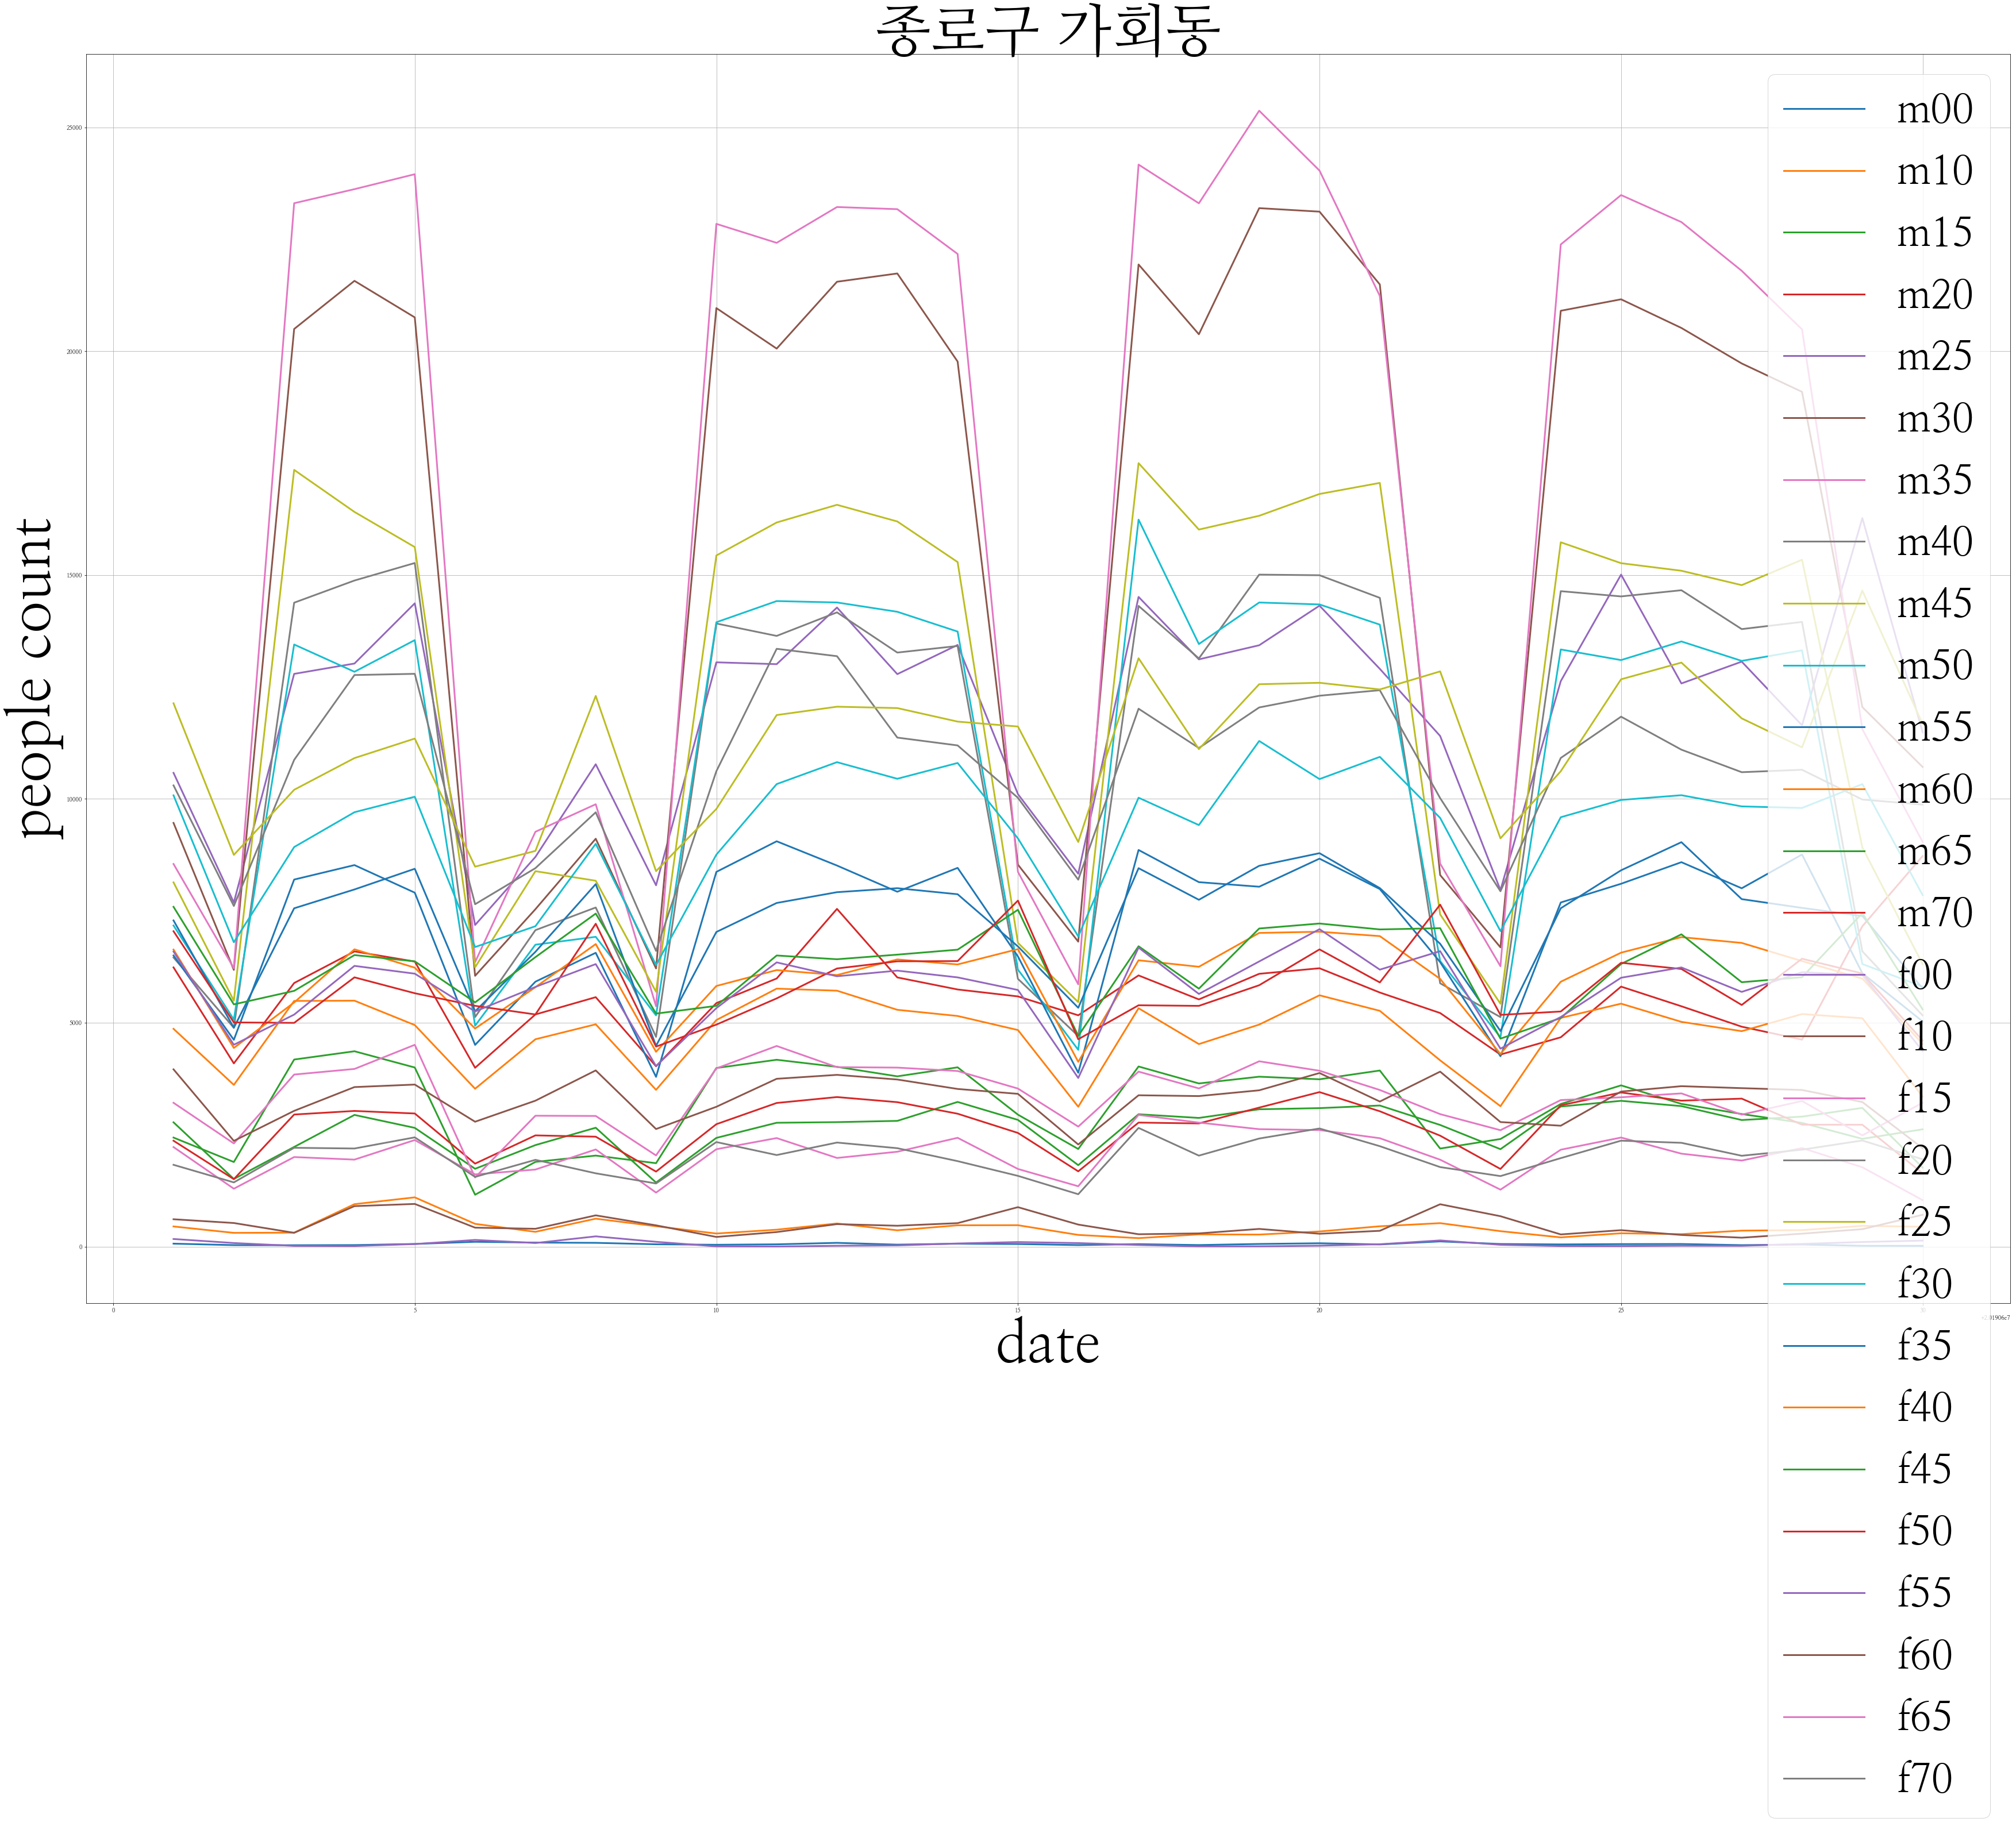

In [433]:
#그래프 따기
plt.figure(figsize=(60,40))
people_type=['m00', 'm10', 'm15', 'm20', 'm25', 'm30', 'm35',
       'm40', 'm45', 'm50', 'm55', 'm60', 'm65', 'm70', 'f00', 'f10', 'f15',
       'f20', 'f25', 'f30', 'f35', 'f40', 'f45', 'f50', 'f55', 'f60', 'f65',
       'f70']#, 'm_total', 'w_total', 'total']

for type_ in people_type:
    target=place_data[0]
    plt.plot(target["etl_ymd"], target[type_], linewidth=3)
plt.ylabel("people count", fontsize=100)
plt.xlabel("date", fontsize=100)
plt.title(place_list[0], fontsize=100)
plt.legend(people_type,fontsize=70)
plt.show()

C:\Users\sprin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


OSError: [Errno 22] Invalid argument: 'data/img/중구 장충동_people_count.jpg'

<Figure size 864x504 with 0 Axes>

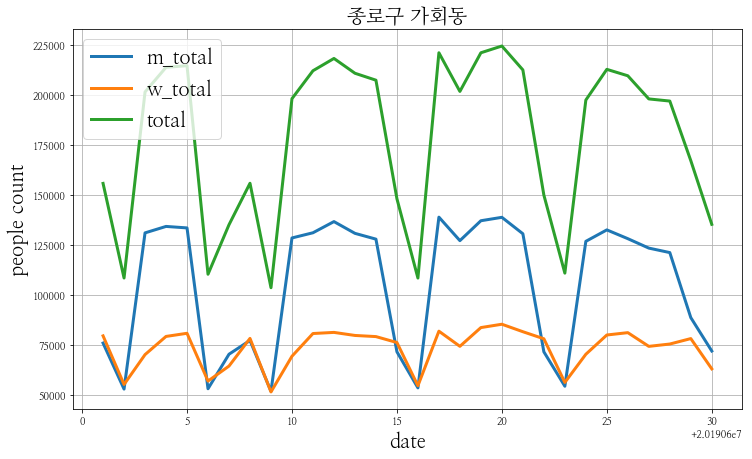

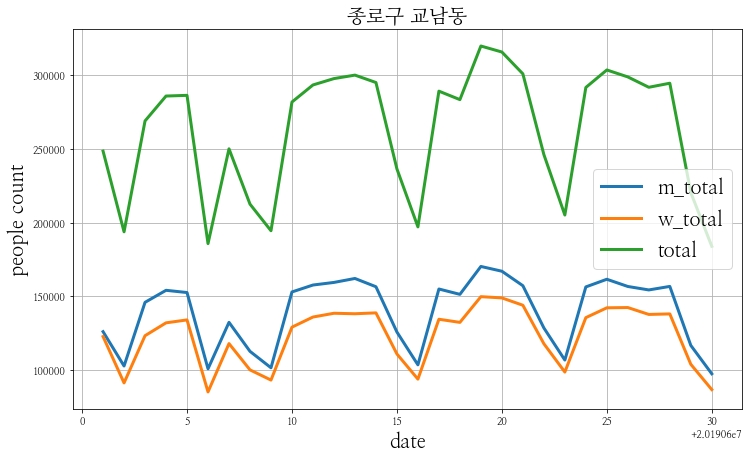

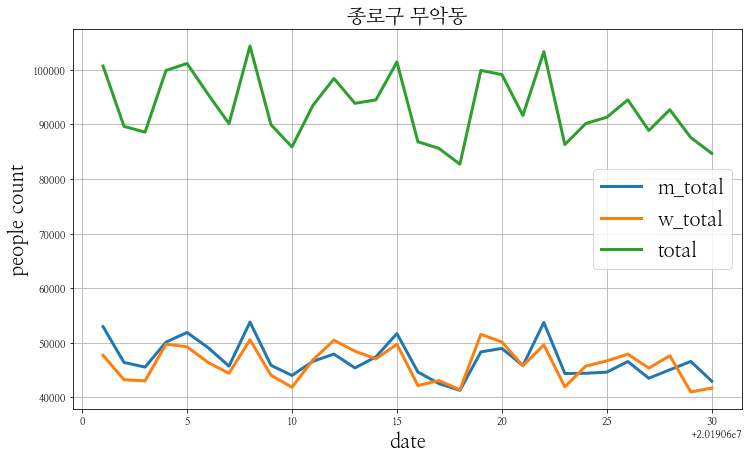

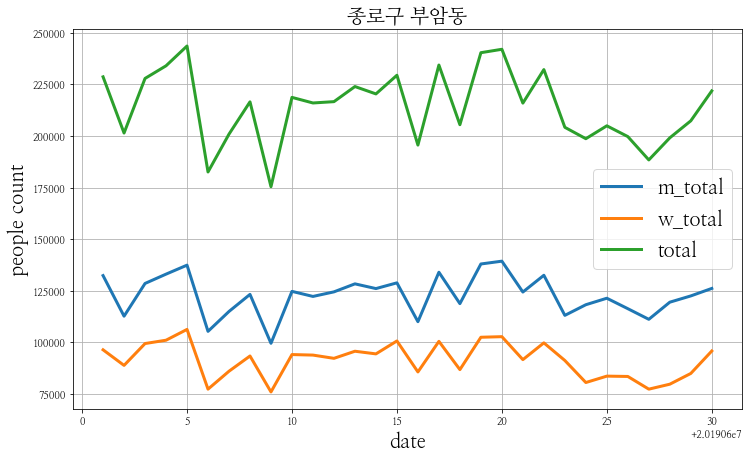

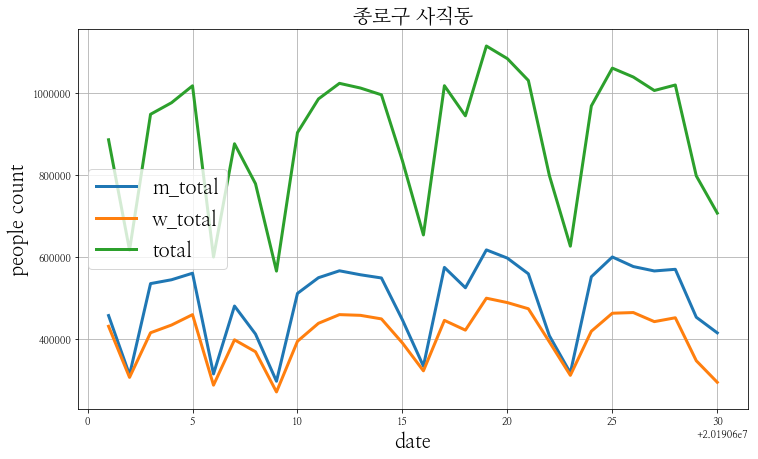

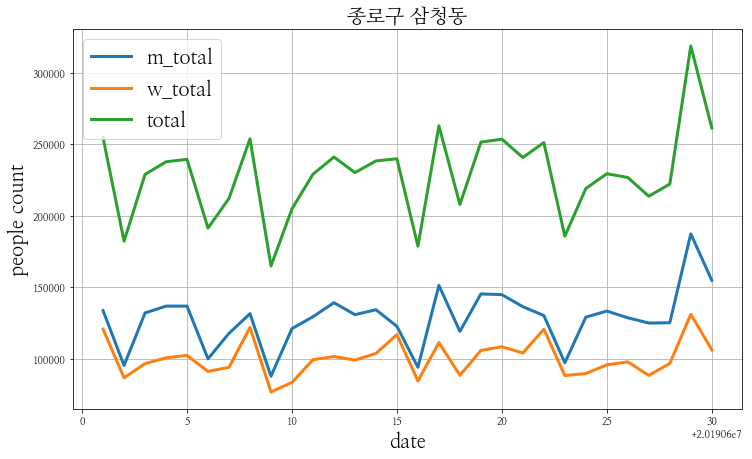

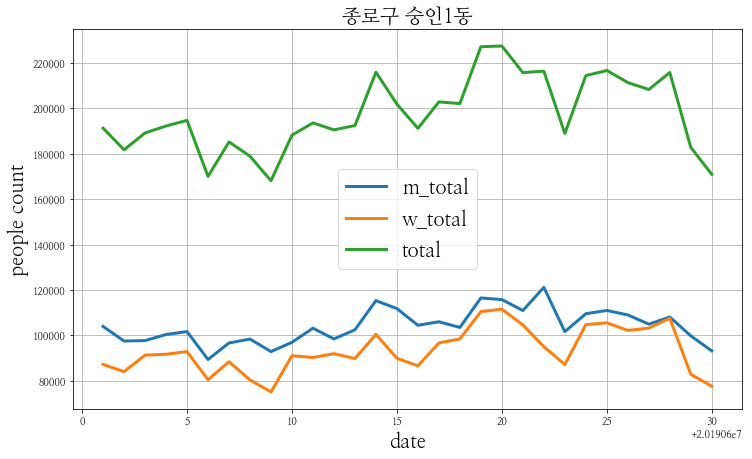

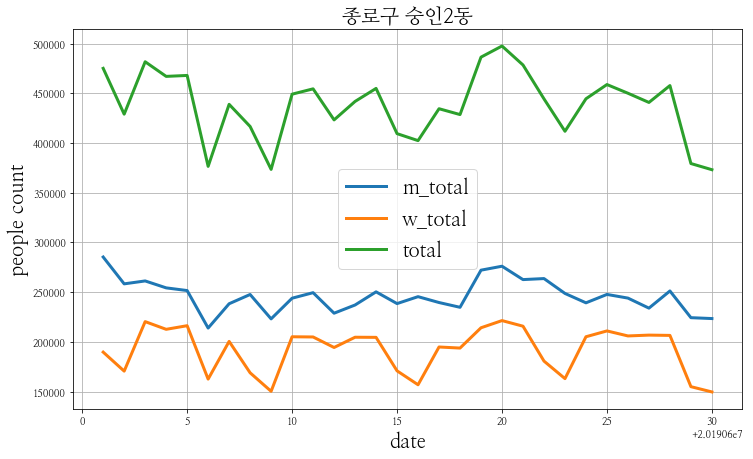

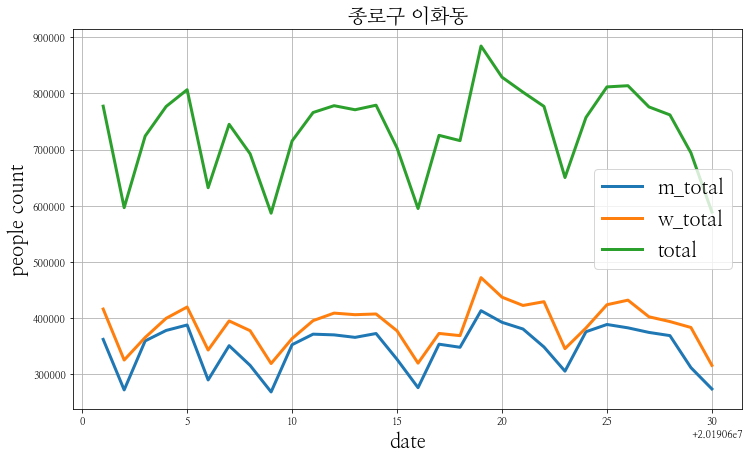

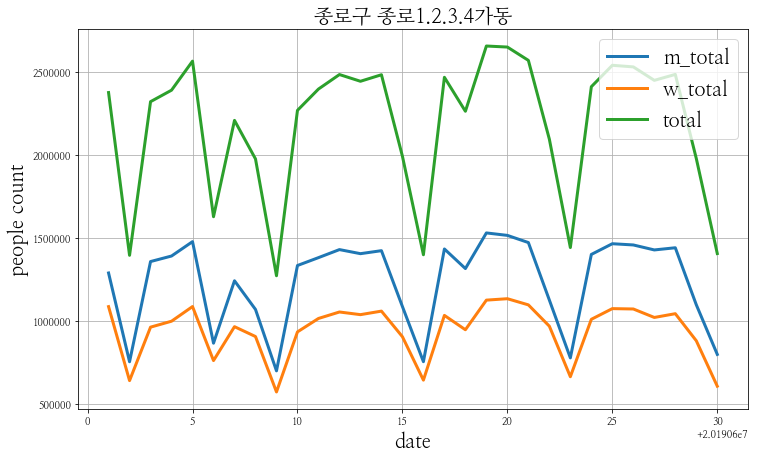

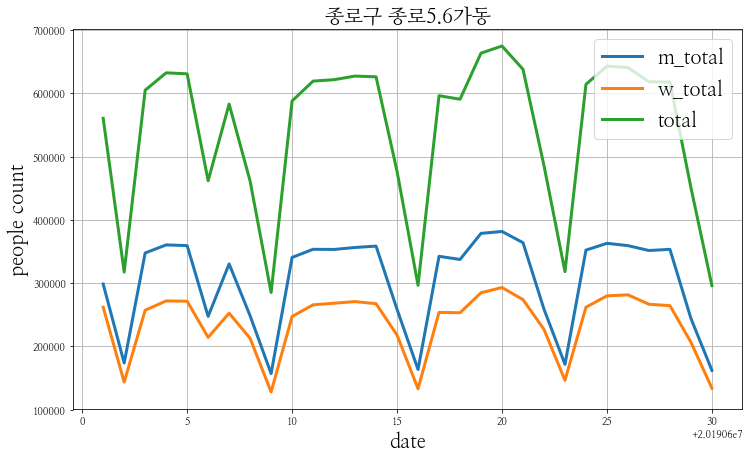

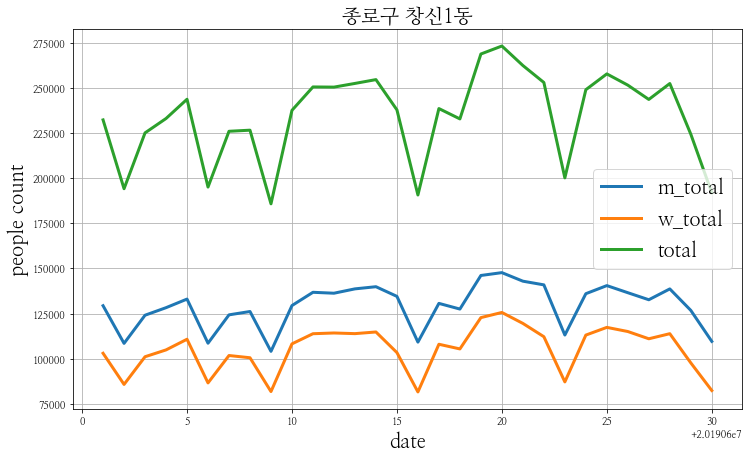

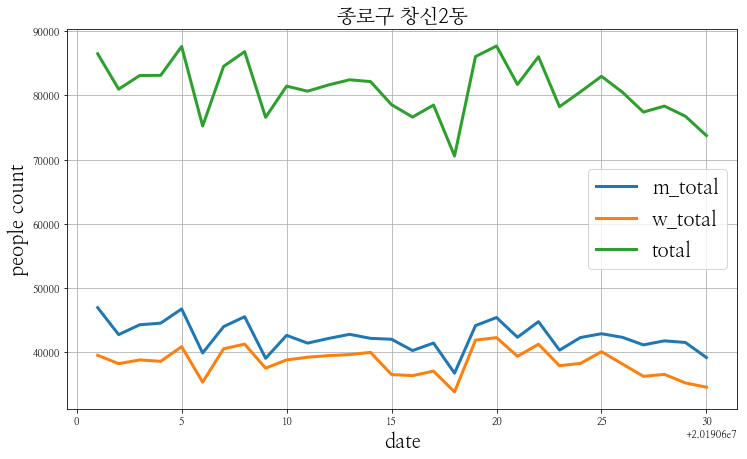

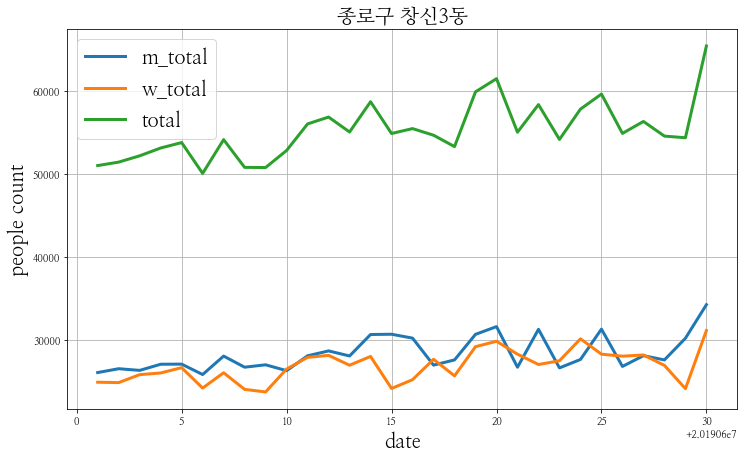

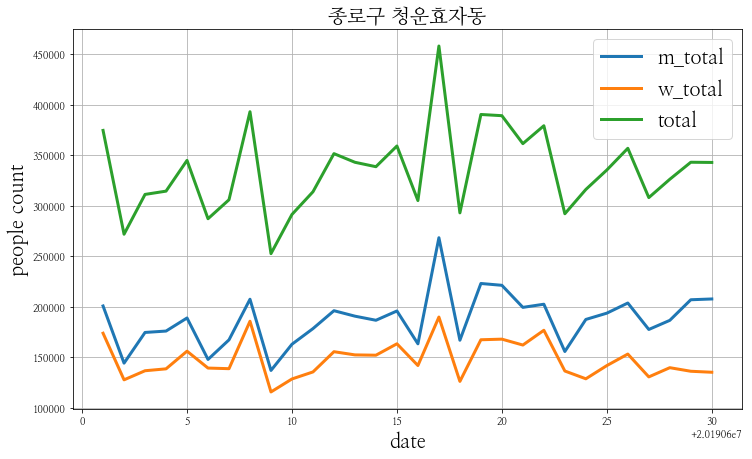

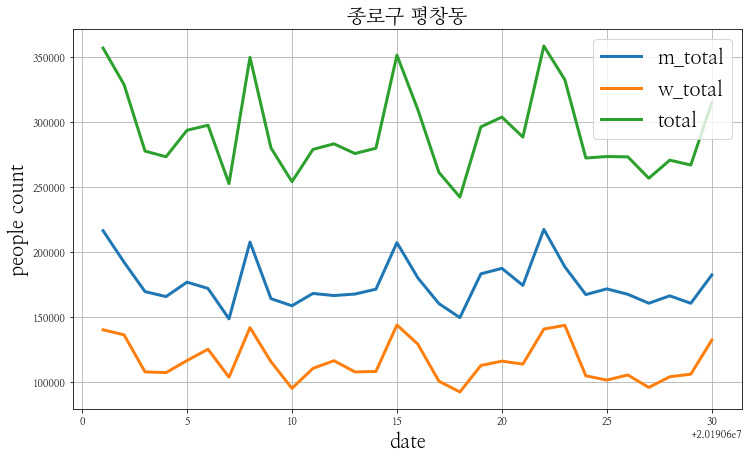

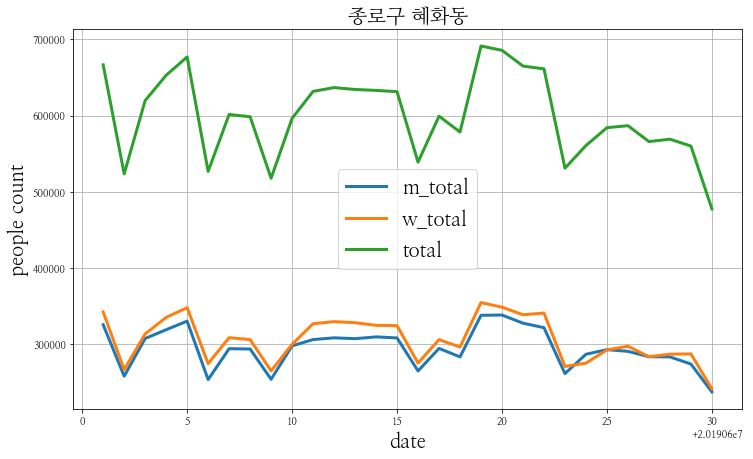

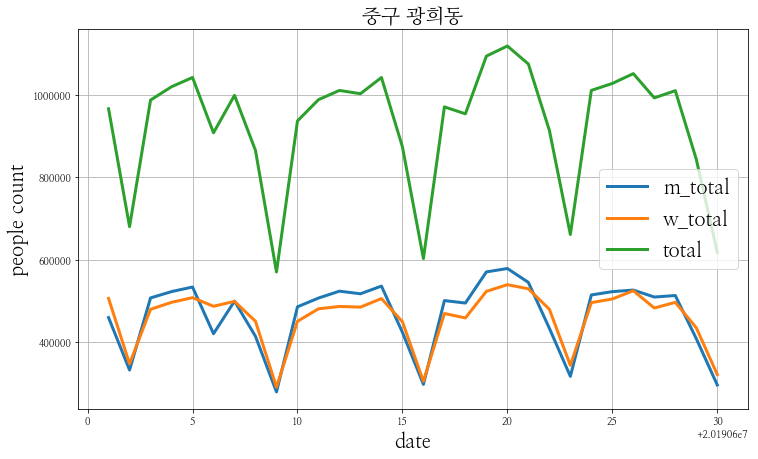

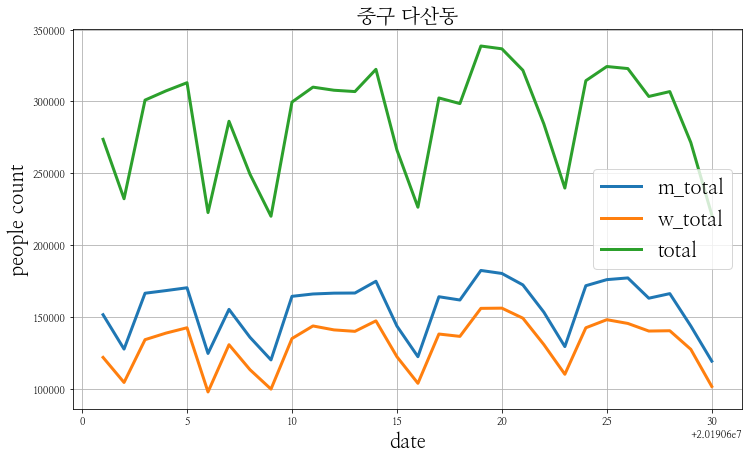

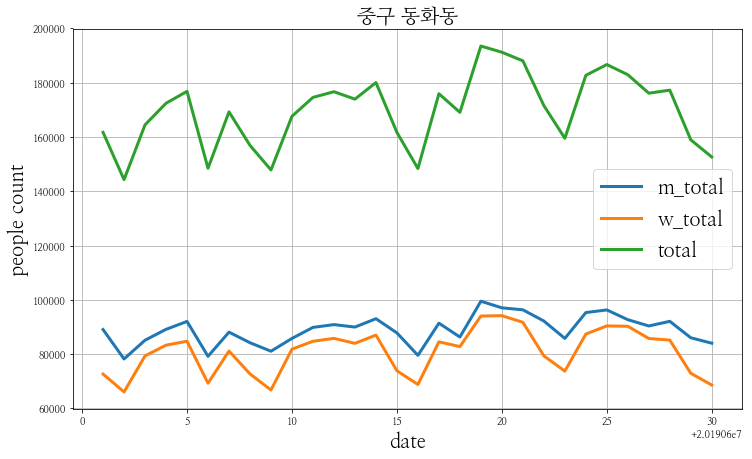

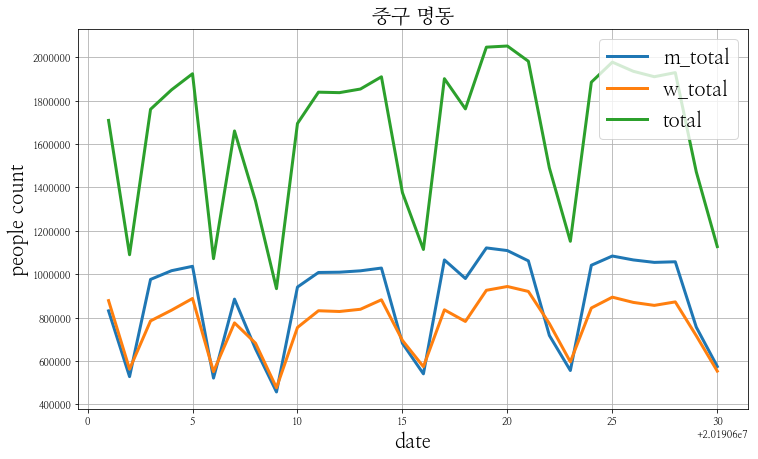

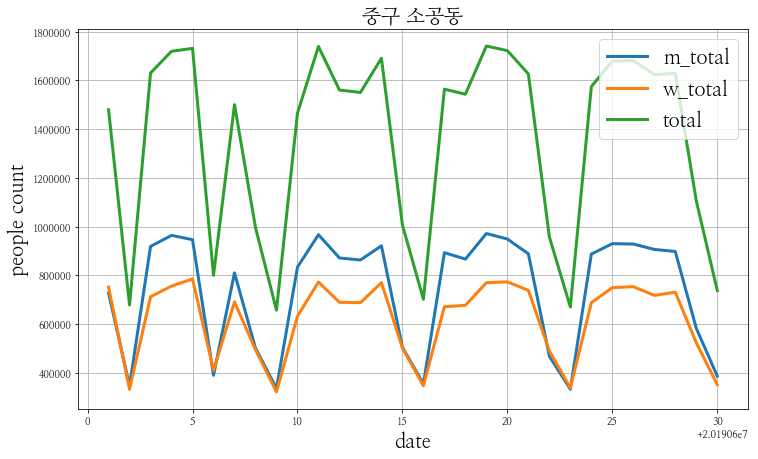

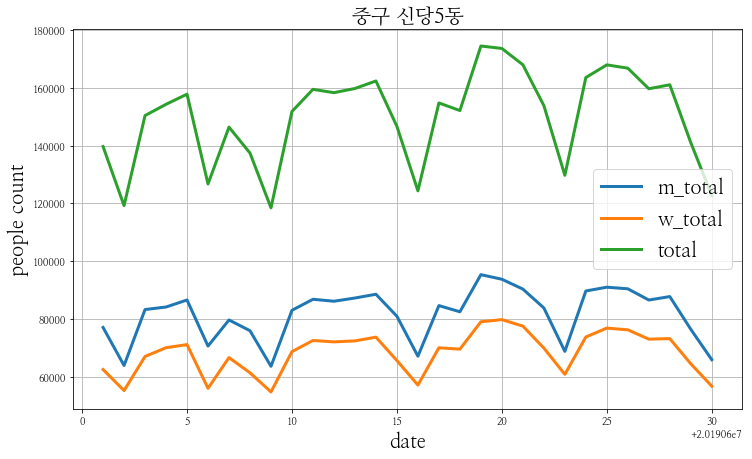

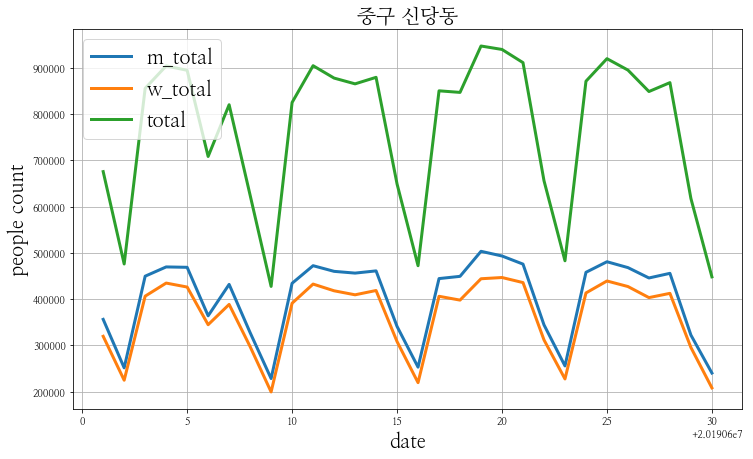

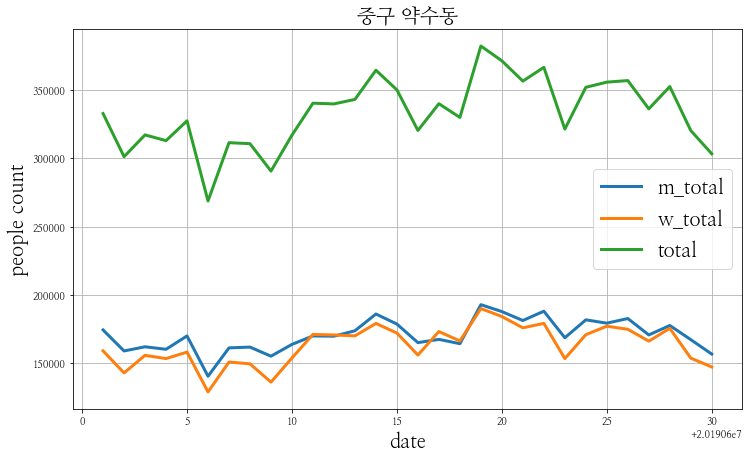

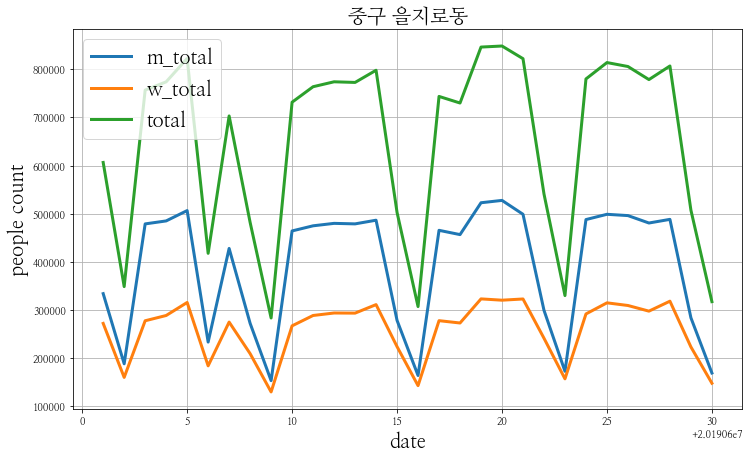

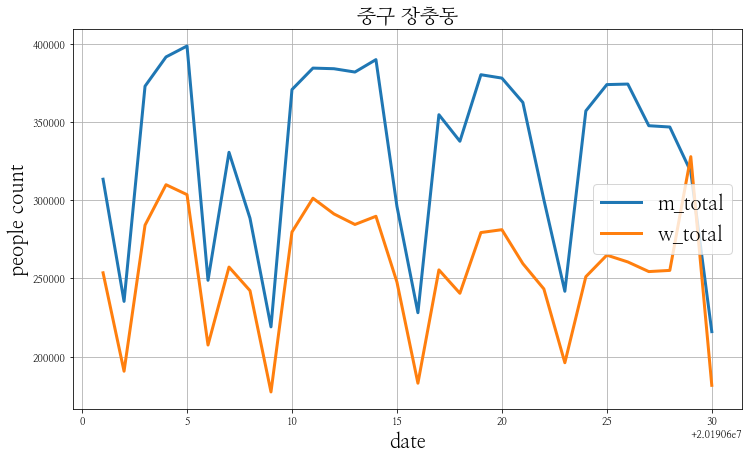

In [462]:
#그래프 따기
plt.figure(figsize=(12,7))
people_type=['m_total', 'w_total', 'total']

for place_num in range(len(place_list)):
    plt.figure(figsize=(12,7))
    for type_ in people_type:
        target=place_data[place_num]
        plt.plot(target["etl_ymd"], target[type_], linewidth=3)
        plt.ylabel("people count", fontsize=20)
        plt.xlabel("date", fontsize=20)
        plt.title(place_list[place_num], fontsize=20)
        plt.legend(people_type,fontsize=20)
        fig=plt.gcf()
        fig.savefig('data/img/'+place_list[place_num]+'_people_count.jpg', dpi=150)
plt.show()

In [8]:
place_data[0]

place   etl_ymd  m00   m10   m15   m20    m25    m30    m35    m40  \
0   종로구 가회동  20190601   67   451  2436  6237  10582   9464   8547   6458   
1   종로구 가회동  20190602   34   308  1890  4093   7686   6181   6219   4888   
2   종로구 가회동  20190603   32   313  4179  5888  12793  20496  23305  14383   
3   종로구 가회동  20190604   35   949  4364  6594  13024  21571  23619  14878   
4   종로구 가회동  20190605   60  1101  4001  6368  14369  20755  23953  15269   
5   종로구 가회동  20190606  108   509  1160  3995   7184   6049   6355   5128   
6   종로구 가회동  20190607   91   331  1893  5186   8704   7537   9266   7069   
7   종로구 가회동  20190608   85   625  2034  5572  10775   9111   9881   7575   
8   종로구 가회동  20190609   53   456  1864  4028   8071   6214   5370   4686   
9   종로구 가회동  20190610   42   293  3990  5440  13051  20963  22844  13918   
10  종로구 가회동  20190611   52   379  4174  5989  13010  20058  22420  13641   
11  종로구 가회동  20190612   85   517  4016  7544  14275  21551  23220  14167   
12  종로구 가회동  20190613   45   365  3804  6013  12787  21736  23172  13269   
13  종로구 가회동  20190614   66   477  4005  5744  13439  19769  22172  13416   
14  종로구 가회동  20190615   59   479  2948  5589  10108   8532   8372   5981   
15  종로구 가회동  20190616   35   262  2181  5167   8329   6812   5859   4704   
16  종로구 가회동  20190617   56   190  4024  6058  14512  21937  24168  14311   
17  종로구 가회동  20190618   36   274  3645  5522  13117  20378  23303  13138   
18  종로구 가회동  20190619   60   270  3796  6094  13432  23195  25371  15010   
19  종로구 가회동  20190620   76   339  3738  6218  14316  23117  24034  14996   
20  종로구 가회동  20190621   49   455  3934  5676  12905  21491  21234  14491   
21  종로구 가회동  20190622  117   525  2191  5218  11406   8300   8556   5882   
22  종로구 가회동  20190623   59   346  2404  4290   7964   6685   6263   5127   
23  종로구 가회동  20190624   50   207  3187  4676  12631  20903  22384  14640   
24  종로구 가회동  20190625   57   299  3602  5808  15010  21159  23487  14523   
25  종로구 가회동  20190626   59   279  3189  5369  12579  20519  22884  14661   
26  종로구 가회동  20190627   34   358  2962  4913  13066  19726  21796  13793   
27  종로구 가회동  20190628   48   369  2764  4624  11644  19092  20487  13953   
28  종로구 가회동  20190629   19   465  2408  7156  16272  12051  11558   6596   
29  종로구 가회동  20190630   18   445  2621  8725  11486  10713   9039   5164   

     ...     f40   f45   f50   f55   f60   f65   f70  m_total  w_total   total  
0    ...    6635  7590  7045  6591  3960  2224  1828    76062    79673  155735  
1    ...    4438  5411  5008  4509  2362  1294  1435    53115    55417  108532  
2    ...    5454  5713  4998  5183  3033  2001  2208   131052    70318  201370  
3    ...    6641  6512  6015  6271  3564  1944  2192   134273    79387  213660  
4    ...    6231  6372  5660  6097  3620  2381  2441   133530    80953  214483  
5    ...    4871  5456  5379  5253  2790  1614  1558    53289    57123  110412  
6    ...    5795  6466  5186  5801  3260  1722  1939    70510    64608  135118  
7    ...    6758  7439  7212  6311  3936  2171  1638    77392    78408  155800  
8    ...    4352  5205  4468  4033  2627  1207  1411    52002    51691  103693  
9    ...    5822  5378  4959  5327  3124  2176  2336   128519    69504  198023  
10   ...    6177  6503  5545  6349  3749  2425  2046   131109    80838  211947  
11   ...    6066  6419  6213  6039  3837  1981  2325   136683    81398  218081  
12   ...    6415  6522  6373  6165  3733  2120  2199   130821    79876  210697  
13   ...    6303  6633  6378  6014  3522  2431  1910   127929    79306  207235  
14   ...    6645  7524  7729  5733  3413  1735  1581    71732    76341  148073  
15   ...    4127  4708  4632  3767  2282  1349  1171    53717    54790  108507  
16   ...    6396  6709  5391  6679  3381  2942  2652   138907    82010  220917  
17   ...    6251  5762  5378  5644  3363  2771  2033   127180    74450  201630  
18   ...    7007  7106  5839  6370  3492  2624  2415   137112    83801  220913  
19   ...    7034  7217  6639 